In [1]:
import datetime
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

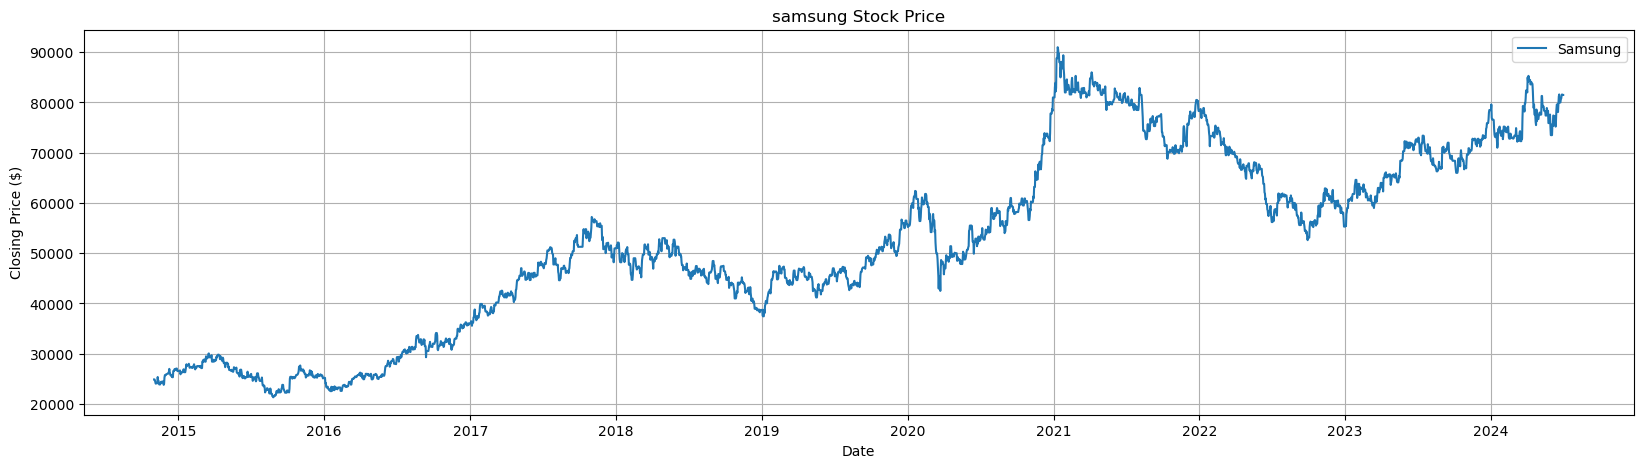

In [2]:
# 지표 데이터 가져오기
stock_data = pd.read_excel('../index_Infomation_v0.1.xlsx')
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# 삼전 주식 데이터 가져오기
samsung_df = stock_data[['Date', 'samsung_Close']]

# 삼전 주식 그래프 그리기
plt.figure(figsize=(20, 5))
plt.plot(samsung_df['Date'], samsung_df['samsung_Close'], label='Samsung')

plt.title('samsung Stock Price')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.grid(True)

plt.show()


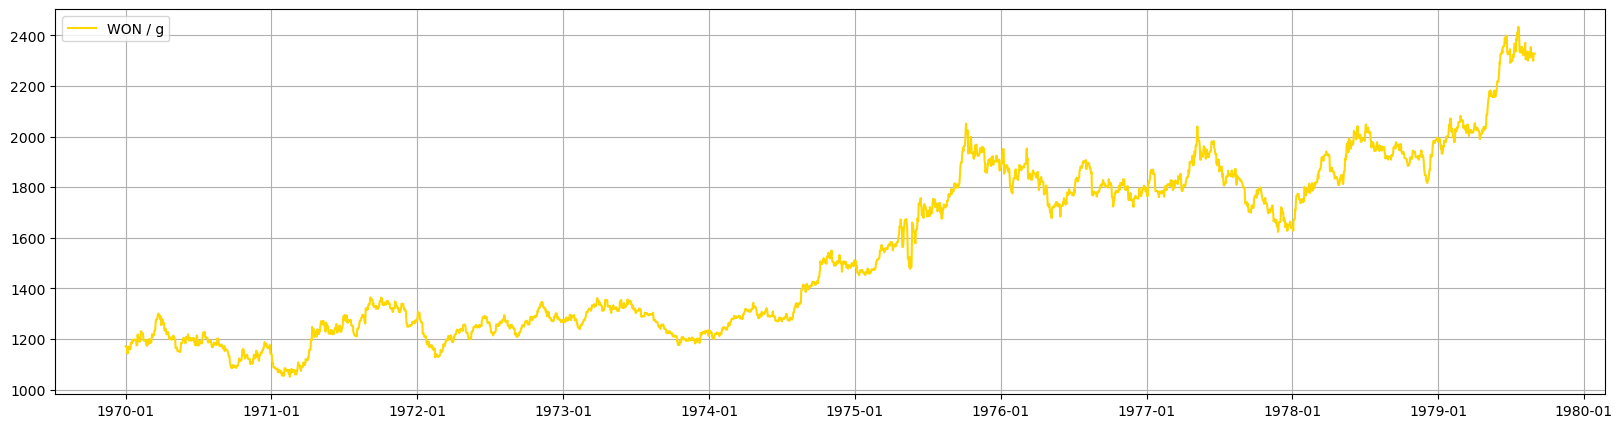

In [3]:
gold_df = pd.read_excel('../index_Infomation_v0.1.xlsx')
gold_df = gold_df[['Date', 'gold_Close']]
gold_df['Date'] = pd.to_datetime(gold_df['Date'])
# 꺽은선 그래프 그리기
plt.figure(figsize=(20, 5))
plt.plot(gold_df.index, gold_df['gold_Close'], label='WON / g', color='gold')

# 3년마다 x축 레이블 표시
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks()
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# 0과 1 사이의 값으로 정규화
def normalize(df, column):
    return (df[column] - df[column].min()) / (df[column].max() - df[column].min())

In [5]:
samsung_normal_df = normalize(samsung_df, 'samsung_Close')
gold_normal_df = normalize(gold_df, 'gold_Close')

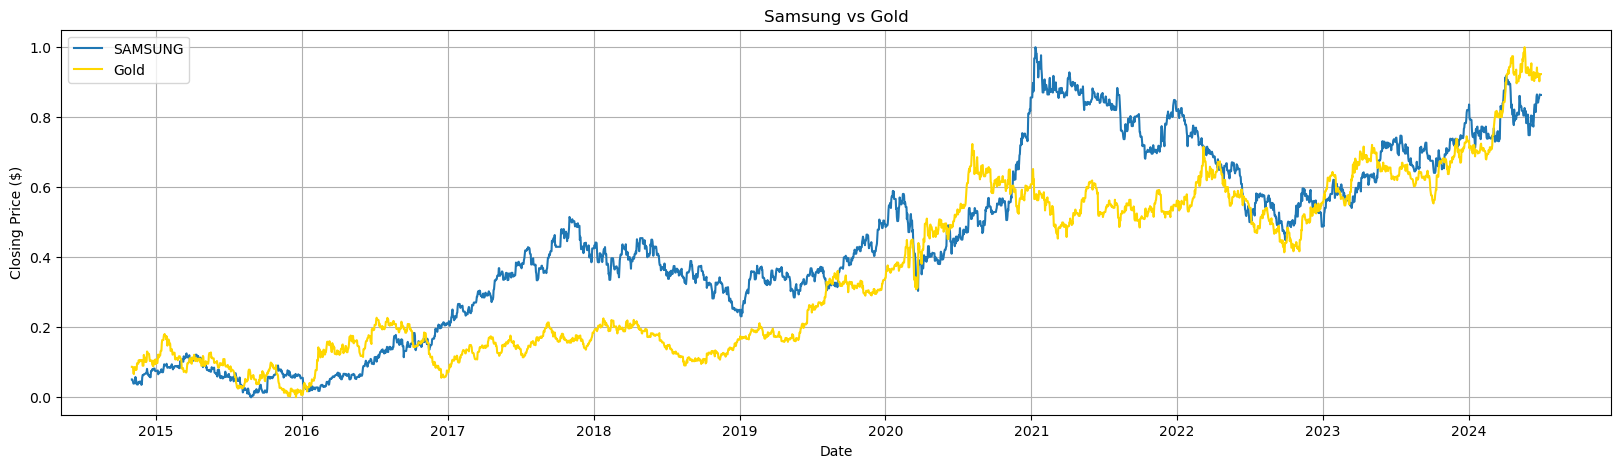

In [6]:
# 정규화 적용 애플 주식과 금 가격 그래프
plt.figure(figsize=(20, 5))
plt.plot(samsung_df['Date'], samsung_normal_df, label='SAMSUNG')
plt.plot(gold_df['Date'], gold_normal_df, label='Gold', color='gold')

plt.title('Samsung vs Gold')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.grid(True)

plt.show()

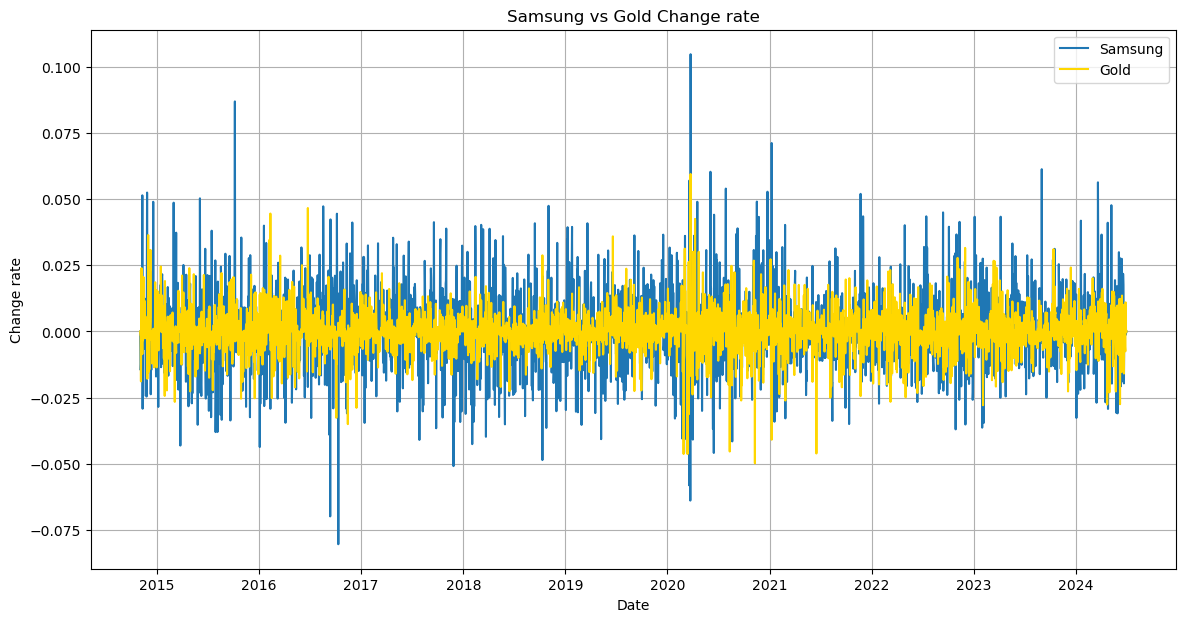

In [7]:
# 변동율 차이 비교

# 일간 변동률 계산 (판다스 함수 이용)  # shift(1) 이용하여 차이 게산도 가능
daily_change_samsung_df = samsung_df['samsung_Close'].pct_change()
daily_change_gold_df = gold_df['gold_Close'].pct_change()

# 그래프화
plt.figure(figsize=(14, 7))
plt.plot(samsung_df['Date'], daily_change_samsung_df, label='Samsung')
plt.plot(gold_df['Date'], daily_change_gold_df, label='Gold', color='gold')

plt.title('Samsung vs Gold Change rate')
plt.xlabel('Date')
plt.ylabel('Change rate')
plt.legend()
plt.grid(True)

plt.show()

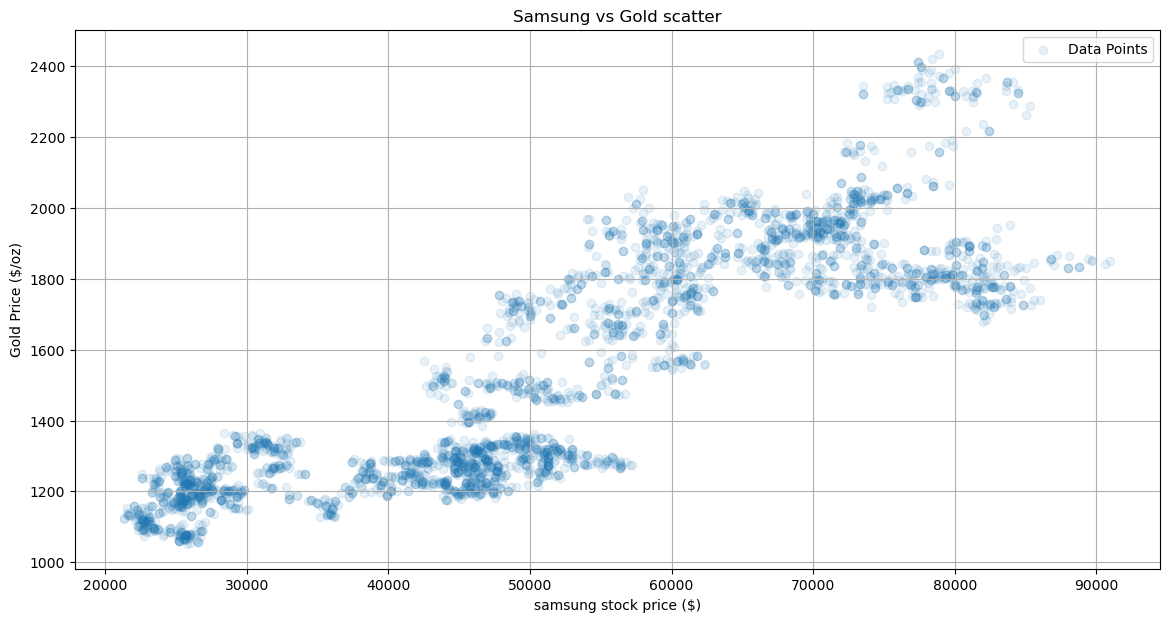

In [8]:
# 애플 주식과 금 값 데이터 병합
# 애플 Date컬럼 시간대 제거
# apple_df['Date'] = apple_df['Date'].dt.tz_localize(None)

merge_df = pd.merge(samsung_df[['Date', 'samsung_Close']], gold_df[['Date', 'gold_Close']], on='Date', how='inner')
# merged_df

# 산점도
plt.figure(figsize=(14, 7))
plt.scatter(merge_df['samsung_Close'], merge_df['gold_Close'], alpha=0.1, label='Data Points')


plt.title('Samsung vs Gold scatter')
plt.xlabel('samsung stock price ($)')
plt.ylabel('Gold Price ($/oz)')
plt.legend()
plt.grid(True)

plt.show()

In [9]:
# Calculate the correlation
correlation = merge_df['gold_Close'].corr(merge_df['samsung_Close'])
print(f"Correlation between Gold Price and Samsung Stock Price: {correlation:.2f}")

Correlation between Gold Price and Samsung Stock Price: 0.86


In [10]:
compare1 = "samsung"  # samsung, apple
compare2 = "금"
compare2data = "gold_Close"

C:\Users\4호실-8\AppData\Local\Temp\ipykernel_4472\616472008.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['US_GDP_KRW'] = round(df[f'{compare2data}'] * df['dollar_to_won_Close'])
c:\Anaconda3\envs\myenv\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Anaconda3\envs\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.7391  , p=0.0018  , df_denom=3526, df_num=1
ssr based chi2 test:   chi2=9.7474  , p=0.0018  , df=1
likelihood ratio test: chi2=9.7339  , p=0.0018  , df=1
parameter F test:         F=9.7391  , p=0.0018  , df_denom=3526, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=9.3805  , p=0.0001  , df_denom=3523, df_num=2
ssr based chi2 test:   chi2=18.7877 , p=0.0001  , df=2
likelihood ratio test: chi2=18.7378 , p=0.0001  , df=2
parameter F test:         F=9.3805  , p=0.0001  , df_denom=3523, df_num=2
                              OLS Regression Results                             
Dep. Variable:     gold_Close_Normalized   R-squared:                       0.744
Model:                               OLS   Adj. R-squared:                  0.744
Method:                    Least Squares   F-statistic:                 1.024e+04
Date:                   Thu, 08 Aug 2024   Prob (F-statistic):  

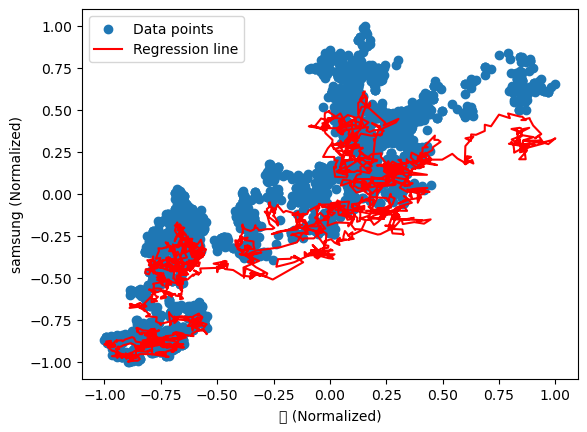

c:\Anaconda3\envs\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


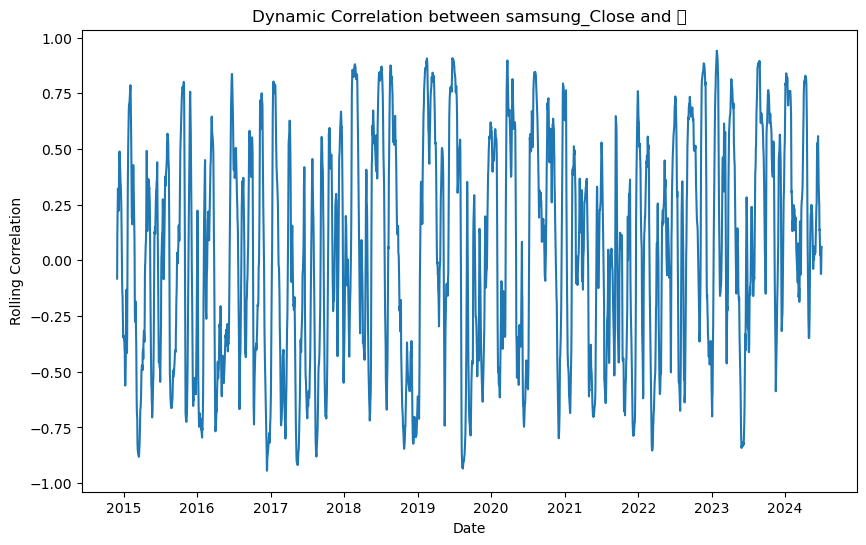

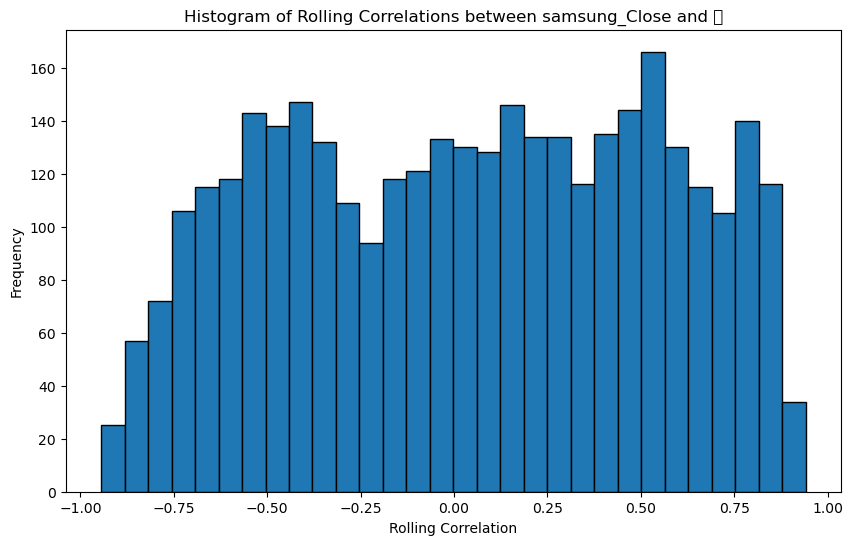


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.7391  , p=0.0018  , df_denom=3526, df_num=1
ssr based chi2 test:   chi2=9.7474  , p=0.0018  , df=1
likelihood ratio test: chi2=9.7339  , p=0.0018  , df=1
parameter F test:         F=9.7391  , p=0.0018  , df_denom=3526, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=9.3805  , p=0.0001  , df_denom=3523, df_num=2
ssr based chi2 test:   chi2=18.7877 , p=0.0001  , df=2
likelihood ratio test: chi2=18.7378 , p=0.0001  , df=2
parameter F test:         F=9.3805  , p=0.0001  , df_denom=3523, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.4169  , p=0.0002  , df_denom=3520, df_num=3
ssr based chi2 test:   chi2=19.2890 , p=0.0002  , df=3
likelihood ratio test: chi2=19.2365 , p=0.0002  , df=3
parameter F test:         F=6.4169  , p=0.0002  , df_denom=3520, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.3044  , p=0.

c:\Anaconda3\envs\myenv\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [11]:
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import grangercausalitytests

# 필요한 데이터만 가져오기
df = stock_data[['Date', f'{compare1}_Close', f'{compare2data}', 'dollar_to_won_Close']]
df['US_GDP_KRW'] = round(df[f'{compare2data}'] * df['dollar_to_won_Close'])
df.head(3)

def normalize_data(series):
    # MinMaxScaler를 사용하여 데이터를 -1과 1 사이로 정규화
    scaler = MinMaxScaler(feature_range=(-1, 1))
    return scaler.fit_transform(series.values.reshape(-1, 1))

def Regression(compare1, compare2data, compare2):
    # 데이터 정규화
    stock_data[f'{compare1}_Close_Normalized'] = normalize_data(stock_data[f'{compare1}_Close'])
    stock_data[f'{compare2data}_Normalized'] = normalize_data(stock_data[f'{compare2data}'])

    # 선형 회귀 분석
    X = stock_data[f'{compare1}_Close_Normalized']
    y = stock_data[f'{compare2data}_Normalized']
    X = sm.add_constant(X)  # 상수항 추가
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)

    # 회귀 분석 결과 출력
    print(model.summary())

    # 산점도 및 회귀선 그래프
    plt.scatter(stock_data[f'{compare2data}_Normalized'], stock_data[f'{compare1}_Close_Normalized'], label='Data points')
    plt.plot(stock_data[f'{compare2data}_Normalized'], predictions, color='red', label='Regression line')
    plt.xlabel(f'{compare2} (Normalized)')
    plt.ylabel(f'{compare1} (Normalized)')
    plt.legend()
    plt.show()

    
def rolling_correlation_and_granger_test(compare1, compare2data, compare2, window_size=30, max_lag=5, stock_data=stock_data):
    col1 = f'{compare1}_Close'
    col2 = compare2data

    # 날짜 인덱스 설정
    if not pd.api.types.is_datetime64_any_dtype(stock_data.index):
        stock_data.index = pd.to_datetime(stock_data['Date'])
        stock_data = stock_data.drop(columns=['Date'])

    # 롤링 상관관계 계산
    rolling_corr = stock_data[col1].rolling(window=window_size).corr(stock_data[col2]).dropna()

    # 무한 값과 NaN 값 제거
    rolling_corr = rolling_corr[~rolling_corr.isin([np.inf, -np.inf])].dropna()

    # 롤링 상관관계 그래프 그리기
    plt.figure(figsize=(10, 6))
    plt.plot(rolling_corr)
    plt.xlabel('Date')
    plt.ylabel('Rolling Correlation')
    plt.title(f'Dynamic Correlation between {col1} and {compare2}')
    plt.show()

    # 롤링 상관관계의 히스토그램 그리기
    plt.figure(figsize=(10, 6))
    plt.hist(rolling_corr, bins=30, edgecolor='k')
    plt.xlabel('Rolling Correlation')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Rolling Correlations between {col1} and {compare2}')
    plt.show()

    # 그랜저 인과성 테스트
    granger_test_result = grangercausalitytests(stock_data[[col1, col2]], max_lag, verbose=True)

    return rolling_corr, granger_test_result

def Granger(compare1, compare2data, compare2, stock_data=stock_data):
    if f'{compare1}_Close' not in stock_data.columns or compare2data not in stock_data.columns:
        raise KeyError(f"Columns {compare1}_Close and/or {compare2data} not found in the provided DataFrame")
    
    max_lag = 2
    result1 = grangercausalitytests(stock_data[[f'{compare1}_Close', compare2data]], max_lag, verbose=True)
    result2 = coint_johansen(stock_data[[f'{compare1}_Close', compare2data]], det_order=-1, k_ar_diff=1)
    
    return result1, result2.lr1, result2.cvt

def everything(compare1, compare2data, compare2):
    Granger(compare1, compare2data, compare2)
    Regression(compare1, compare2data, compare2)
    rolling_correlation_and_granger_test(compare1, compare2data, compare2)
everything(compare1, compare2data, compare2)